In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from keras.models import Model
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from keras.layers import Dense, Dropout, Activation, Input
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

# Rede Neural - Regressão Multipla

In [3]:
# Importando base de dados
base = pd.read_csv('../dados/games.csv')
base.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Excluindo features
base = base.drop(['Other_Sales', 'Global_Sales', 'Developer', 'Name'], axis = 1)

## Saneamento dos dados
### Tratando valores nulos

<AxesSubplot:>

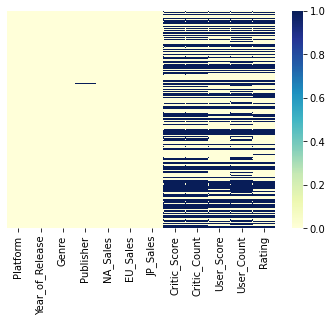

In [5]:
# Verificando valores nulos
sb.heatmap(base.isnull(), cmap = "YlGnBu", yticklabels = False)

In [4]:
base.isnull().sum().sort_values(ascending = False)

User_Count         9129
Critic_Score       8582
Critic_Count       8582
Rating             6769
User_Score         6704
Year_of_Release     269
Publisher            54
Genre                 2
Platform              0
NA_Sales              0
EU_Sales              0
JP_Sales              0
dtype: int64

In [5]:
# Excluindo linhas com valores nan
base = base.dropna(axis = 0)

In [6]:
# Pegando valores maiores que 1
base = base.loc[base['NA_Sales'] > 1]
base = base.loc[base['EU_Sales'] > 1]

In [7]:
previsores = base.iloc[:, [0, 1, 2, 3, 7, 8, 9, 10, 11]].values
venda_na = base.iloc[:, 4].values
venda_eu = base.iloc[:, 5].values
venda_jp = base.iloc[:, 6].values

In [8]:
# Tranformando as features odjects para númericas, usando get_dummies
# previsores = pd.get_dummies(data = previsores, columns = ['Platform', 'Genre', 'Publisher', 'Rating'])

In [8]:
labelencoder = LabelEncoder()
previsores[:, 0] = labelencoder.fit_transform(previsores[:, 0])
previsores[:, 2] = labelencoder.fit_transform(previsores[:, 2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])

In [9]:
onehotencoder = ColumnTransformer(transformers = [("OneHot", OneHotEncoder(), [0, 2, 3, 8])], remainder = 'passthrough')
previsores = onehotencoder.fit_transform(previsores).toarray()

In [10]:
# Estrutura da rede neural
camada_entrada = Input(shape = (61,))
camada_oculta1 = Dense(units = 32, activation = 'sigmoid')(camada_entrada)
camada_oculta2 = Dense(units = 32, activation = 'sigmoid')(camada_oculta1)
camada_saida1 = Dense(units = 1, activation = 'linear')(camada_oculta2)
camada_saida2 = Dense(units = 1, activation = 'linear')(camada_oculta2)
camada_saida3 = Dense(units = 1, activation = 'linear')(camada_oculta2)
regressor = Model(inputs = camada_entrada, outputs = [camada_saida1, camada_saida2, camada_saida3])
# Compilando rede neural
regressor.compile(optimizer = 'adam', loss = 'mse')
# Treinando rede neural
regressor.fit(previsores, [venda_na, venda_eu, venda_jp], epochs = 5000, batch_size = 100)

ense_2_loss: 2.6902 - dense_3_loss: 1.5320 - dense_4_loss: 0.7743
Epoch 4869/5000
3/3 [==============================] - 0s 3ms/step - loss: 5.8724 - dense_2_loss: 2.9908 - dense_3_loss: 1.9711 - dense_4_loss: 0.9105
Epoch 4870/5000
3/3 [==============================] - 0s 3ms/step - loss: 4.7566 - dense_2_loss: 2.5536 - dense_3_loss: 1.5052 - dense_4_loss: 0.6978
Epoch 4871/5000
3/3 [==============================] - 0s 3ms/step - loss: 5.3522 - dense_2_loss: 2.9198 - dense_3_loss: 1.7300 - dense_4_loss: 0.7024
Epoch 4872/5000
3/3 [==============================] - 0s 3ms/step - loss: 5.6676 - dense_2_loss: 2.9845 - dense_3_loss: 1.8374 - dense_4_loss: 0.8457
Epoch 4873/5000
3/3 [==============================] - 0s 2ms/step - loss: 4.9556 - dense_2_loss: 2.4567 - dense_3_loss: 1.7894 - dense_4_loss: 0.7095
Epoch 4874/5000
3/3 [==============================] - 0s 3ms/step - loss: 5.1882 - dense_2_loss: 2.6876 - dense_3_loss: 1.7184 - dense_4_loss: 0.7822
Epoch 4875/5000
3/3 [=======

In [11]:
# Prevendo valores
previsao_na, previsao_eu, previsao_jp = regressor.predict(previsores)

# Prevendo Global Sales

In [4]:
# Excluindo features
base = base.drop(['Other_Sales', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Name'], axis = 1)

In [5]:
# Excluindo linhas com valores nan
base = base.dropna(axis = 0)

In [6]:
# Pegando valores maiores que 1
base = base.loc[base['Global_Sales'] > 1]

In [7]:
previsores = base.iloc[:, [0, 1, 2, 3, 5, 6, 7, 8, 9]].values
venda_global = base.iloc[:, 4].values

In [8]:
labelencoder = LabelEncoder()
previsores[:, 0] = labelencoder.fit_transform(previsores[:, 0])
previsores[:, 2] = labelencoder.fit_transform(previsores[:, 2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])

In [9]:
onehotencoder = ColumnTransformer(transformers = [("OneHot", OneHotEncoder(), [0, 2, 3, 8])], remainder = 'passthrough')
previsores = onehotencoder.fit_transform(previsores).toarray()

In [17]:
# Estrutura da rede neural
camada_entrada = Input(shape = (99,))
ativacao = Activation(activation = 'sigmoid')
camada_oculta1 = Dense(units = 50, activation = ativacao)(camada_entrada)
camada_oculta2 = Dense(units = 50, activation = ativacao)(camada_oculta1)
camada_oculta3 = Dense(units = 25, activation = ativacao)(camada_oculta2)
camada_saida = Dense(units = 1, activation = 'linear')(camada_oculta3)
regressor = Model(inputs = camada_entrada, outputs = [camada_saida])
# Compilando rede neural
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Treinando rede neural
regressor.fit(previsores, venda_global, epochs = 3000, batch_size = 100)

Epoch 1/3000
14/14 [==============================] - 0s 1ms/step - loss: 15.4045
Epoch 2/3000
14/14 [==============================] - 0s 2ms/step - loss: 14.3428
Epoch 3/3000
14/14 [==============================] - 0s 2ms/step - loss: 12.9770
Epoch 4/3000
14/14 [==============================] - 0s 2ms/step - loss: 12.9174
Epoch 5/3000
14/14 [==============================] - 0s 2ms/step - loss: 11.7410
Epoch 6/3000
14/14 [==============================] - 0s 2ms/step - loss: 10.6813
Epoch 7/3000
14/14 [==============================] - 0s 2ms/step - loss: 12.8903
Epoch 8/3000
14/14 [==============================] - 0s 2ms/step - loss: 12.5608
Epoch 9/3000
14/14 [==============================] - 0s 2ms/step - loss: 23.5989
Epoch 10/3000
14/14 [==============================] - 0s 2ms/step - loss: 9.2813
Epoch 11/3000
14/14 [==============================] - 0s 2ms/step - loss: 19.6836
Epoch 12/3000
14/14 [==============================] - 0s 2ms/step - loss: 15.8876
Epoch 13/3000


In [18]:
# Prevendo valor para Global_Sales
previsoes = regressor.predict(previsores)

In [19]:
venda_global.mean()

2.837390971690895

In [20]:
previsores.mean()

26.390814804510295